In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL/Churn_Modelling (1).csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

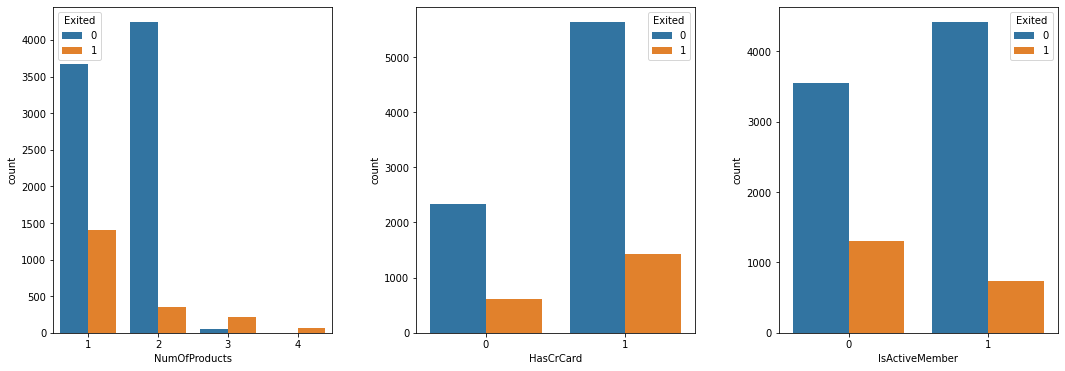

In [10]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

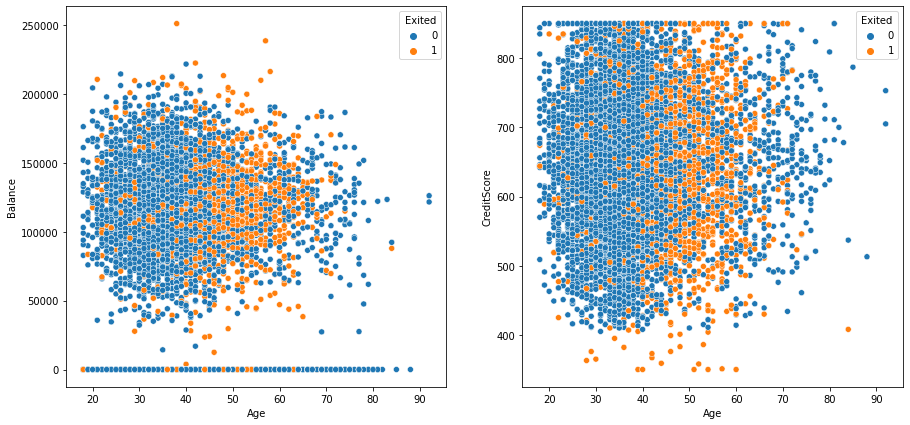

In [11]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

In [12]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

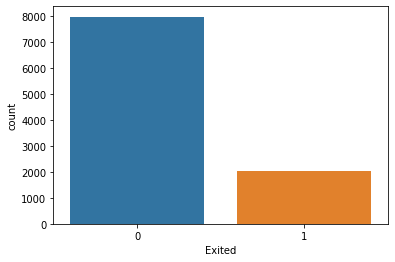

In [13]:
sns.countplot(y)

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 1, 1, 0])

In [15]:
df_num = X.select_dtypes("int64","float64")
df_cat = X.select_dtypes("object")

In [16]:
df_num.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,619,42,2,1,1,1
1,608,41,1,1,0,1
2,502,42,8,3,1,0
3,699,39,1,2,0,0
4,850,43,2,1,1,1


In [17]:
for col in df_num:
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])

In [18]:
df_num.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,-0.326221,0.293517,-1.041760,-0.911583,0.646092,0.970243
1,-0.440036,0.198164,-1.387538,-0.911583,-1.547768,0.970243
2,-1.536794,0.293517,1.032908,2.527057,0.646092,-1.030670
3,0.501521,0.007457,-1.387538,0.807737,-1.547768,-1.030670
4,2.063884,0.388871,-1.041760,-0.911583,0.646092,0.970243


In [19]:
df_cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [20]:
df_cat = pd.get_dummies(df_cat)

In [21]:
df_cat.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [22]:
X = pd.concat([df_num, df_cat], axis=1)
X.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.911583,0.646092,0.970243,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.911583,-1.547768,0.970243,0,0,1,1,0
2,-1.536794,0.293517,1.032908,2.527057,0.646092,-1.030670,1,0,0,1,0
3,0.501521,0.007457,-1.387538,0.807737,-1.547768,-1.030670,1,0,0,1,0
4,2.063884,0.388871,-1.041760,-0.911583,0.646092,0.970243,0,0,1,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm=SMOTE(random_state=42)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [26]:
X_train_sm.shape

(11180, 11)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [28]:
model = Sequential()
model.add(Dense(25, activation="ReLU", input_dim=11))
model.add(BatchNormalization())
model.add(Dense(20, activation="ReLU"))
model.add(BatchNormalization())
model.add(Dense(15, activation="ReLU"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

In [29]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stopping = EarlyStopping(monitor="loss", min_delta=0.01, patience=5)

In [32]:
model.fit(X_train_sm,y_train_sm, batch_size=500, epochs=100, callbacks=[early_stopping])

Epoch 1/100
23/23 [==============================] - 1s 4ms/step - loss: 0.7355
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6183
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5640
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5289
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5042
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4882
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4750
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4652
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4571
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4512
Epoch 11/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4449
Epoch 12/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4376
Epoch 13/100
23/23 [=================

In [33]:

y_pred = model.predict(X_test)

In [34]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2373
           1       0.49      0.68      0.57       627

    accuracy                           0.79      3000
   macro avg       0.70      0.75      0.71      3000
weighted avg       0.82      0.79      0.80      3000

